**TASK 1:** The Fourier transform (FT) is a mathematical transform that decomposes functions depending on space or time into functions 
depending on spatial frequency or temporal frequency." (Wikipedia, Fourier Transform) Your ear and brain can approximatley perform a FT 
by allowing you to distinguish one or multiple concurrent pitches when listening to an audio time waveform.

Mathematically, a temporal waveform $f(t)$ may be Fourier transformed to the frequency domain $f(\nu)$ from which the frequency 
amplitude $A(\nu) = abs(f(\nu))$ may be calculated. It is given by the following equation. 

$$ \large f(\nu) = \int_{-\infty}^{\infty} f(t)e^{-i2pi \nu t} dt $$

Related to the above continuous Fourier transform, we may also compute the discrete Fourier transform, usually via the fast Fourier 
transform (FFT). The FFT is one of the "indispensible algorithms in digital signal processing." (Wikipedia, Fast Fourier Transform) FFTs 
basically implement a FT using data sampled at discrete times rather than continuous times. Fourier transforms in general produce complex 
results (i.e., imaginary numbers) but we are only interested here in the *real amplitude* over positive frequencies. 

We won't really study the math underlying the FFT, although that is also worthwhile. Instead, we will gain a little familiarity with it
through a series of exercises to gain intuition about how it works. Check out the following code cell that produces a "wavepacket" 
consisting of a gaussian (bell curve) function multiplied by a rapidly oscillating cosine function. The following exercises instruct you
to try varying the width of the wavepacket (fw), the oscillation frequency in Hz, and the wavepacket center position in the code, and 
then to answer some following questions. Edit this markdown cell to include your answers at the prompts, below.

The default starting parameters are cp=0, fr=10 (Hz), fw=2 (1/sec). 

1. How do the time trace and FT change if you adjust the oscillation frequency fr? For this, try fr values of 2, 5, 10. Set to 10 when done.

**TYPE ANSWER 1 HERE:** 
Changing fr causes the shape of the time trace to morph slightly, but otherwise not change width or size. For FT, it causes the peak to shift to where fr is located

2. How do the time trace and FT change if you adjust the full width of the wavepacket envelope fw? For this, try fw values of 0.125, 0.5, 2. Set to 2 when done.

**TYPE ANSWER 2 HERE:** 
Time trace becomes wider as fw increases, and shorter if it decreases. FT becomes more percise if fw increases and less percise if fw decreases.

3. How do the time trace and FT change if you adjust the wavepacket center position cp? For this, try cp values of -2, 0, 2. Set to 0 when done.

**TYPE ANSWER 3 HERE:** 
If you adjust cp then the time trace's peak changes location and FT remains stationary/unchanged.

4. Try observing the wavepacket and spectrum for the following frequencies: 2 Hz, 10 Hz, 20 Hz, 30 Hz, increasing by 10Hz at a time until you get to 100 Hz. What do you see happening to the spectrum? Then look up a little bit about "aliasing" on the internet. Write a couple sentences to explain aliasing. 

**TYPE ANSWER 4 HERE:** 
The wavepacket becomes more and then less concentrated while the spectrum becomes higher then lower freq.  Aliasing is the production of an addtional byproduct from a machine (computer, screen, camera, brain) trying to rebuild an original signal using smaller pieces/samples of that larger whole. When a piece of the whole is too large, (bigger than 1/2 of the total 'weight' of sample signals) that piece's influence in determining the original signal overrides and stacks on top of the reconstruction, adding an alias/error/artifact/distortion to it.

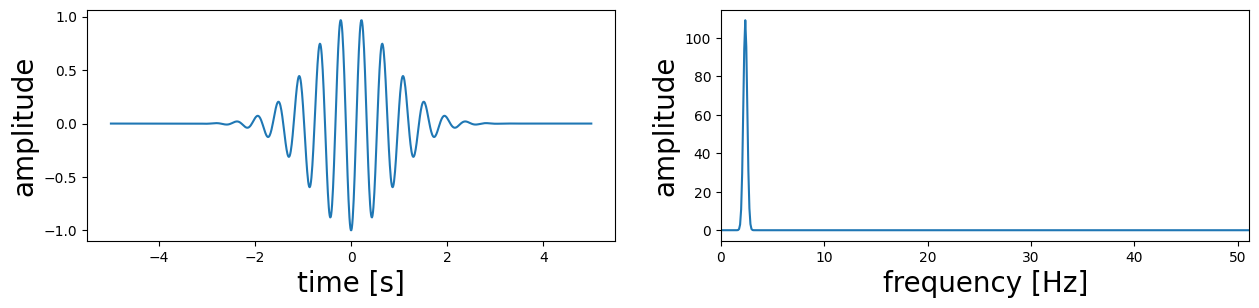

In [42]:
# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

# DEFINE CUSTOM WAVEPACKET FUNCTION
def wavepacket(t, cp, fw, fr):
    std = fw/2.35                  # standard deviation of Gaussian
    return np.exp( -((t-cp)**2)/(2*std**2) )*np.cos(2*np.pi*fr*t)

# DEFINE CUSTOM FOURIER TRANSFORM FUNCTION 
def fft_amp(t, wp1):
    n_pts = np.size(wp1)
    sa = abs(fftshift(fft(wp1)))        # spectral amplitude after FFT
    freq_max = 1/(t[1]-t[0])
    fa = freq_max*np.linspace(-0.5,0.5,n_pts) # frequency array to output
    return sa, fa

# PUT PARAMETERS HERE
n_pts = 2**10                      # powers of two are more efficient for FFT algorithms
t = np.linspace(-5,5,n_pts)        # time in seconds
cp = 0                             # wavepacket center position in seconds, default is 2 seconds
fr = 100                            # oscillation frequency in Hz, default is 10 Hz
fw = 2                             # full width at half max of the wavepacket envelope, default is 2 seconds

# CREATE THE WAVEPACKET
wp1 = wavepacket(t, cp, fw, fr)    # create a wavepacket using the function above

# COMPUTE THE SPECTRAL AMPLITUDE
sa1, fa = fft_amp(t, wp1)

# PLOT STUFF
fs = 20

# plot waveform
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, wp1)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs})

# plot spectral amplitude
ax2 = plt.subplot(1,2,2)
plt.plot(fa, sa1)
plt.xlabel('frequency [Hz]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs})
plt.xlim([0, fa[-1]]);

**Task 2:** There are four parts to task 2 that are all simple variations of Task 2A. Execute each part in its own cell, so there will be one cell for Task 2A, one for Task 2B, one for Task 2C, and one for Task 2D.

*TASK 2A:* Define a custom function that will generate an exponentially decaying oscillating signal (equation is below; consult Python 1 if you forget how). Make sure the custom function can accept a user-defined time array $t$, a decay parameter $k$, and an oscillation frequency $\nu$. You can put the custom function in each of Tasks 2A-2D or just keep the function in the Task 2A cell and avoid clearing the kernel for 2B/2C/2D.

$$ \large f(t) = e^{-kt}cos(2\pi\nu t) $$

Create a waveform consisting of an exponentially decaying oscillating cosine wave with a frequency of 75 Hz (fr=75), a 1/e time decay of 0.2 seconds (k=5/second), and sampled with 512 time points that range from 0 to 1 second. 

Use the fft_amp function defined above (you can keep that in memory in the kernel or else paste it into one or more of the Task 2 cells) to Fourier transform your decaying exponential. 

Create a plot of the waveform (F(t) vs time) side-by-side with a plot of the Fourier transform amplitude vs frequency. Make sure your plots are properly labeled. For fun, try varying the paramters fr and k to see the effect on the waveform and spectral amplitude, but make sure the final plot is for fr=75 Hz, k=5/second.

*TASK 2B:* Create a waveform consisting of the sum of two exponentially decaying oscillating cosine waves. Hint: use your already defined expontial decay function twice and add the outputs. Use the frequencies (in Hz) f1=40, f2=45, both with decays k=2/second. Continue using the same time points from Task 2A. In the cell, create a print statement that describes what you see in the waveform.

*TASK 2C:* Create a waveform consisting of the sum of three exponentially decaying oscillating cosine waves. This time use frequencies (in Hz) f1=40, f2=45, f3=110 and decay constants (in 1/second) of k1=2, k2=2, k3=8. Continue using the same time points from Task 2A. In the cell, create a print statement that describes what you see in the waveform.

*TASK 2D:* Repeat Task 2C with a small variation. This time multiply the second (45Hz) oscillating/decaying cosine wave by 2 and the third (110Hz) by 6 as shown in the equation, below. In your cell for Task 2D, include a print statement answering this queestion: Do the spectral amplitudes change as you expect in the spectral amplitude plot?

$$ \large f(t) = e^{-k_1t}cos(2\pi f_1 t) + 2e^{-k_2t}cos(2\pi f_2 t) + 6e^{-k_3t}cos(2\pi f_3 t) $$


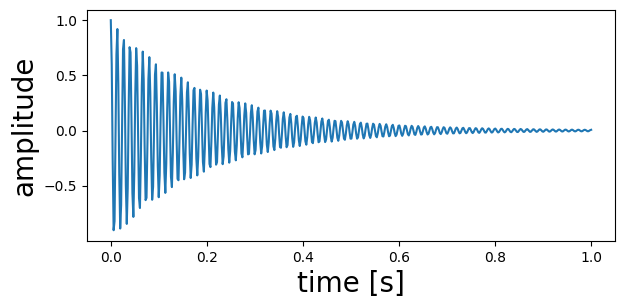

In [2]:
# TASK 2A# 

# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

# DEFINE CUSTOM DECAYING EXPONENTIAL WAVEFORM FUNCTION
def wavepacket(t, fr, k):
    return np.exp(-k*t) * np.cos(2*np.pi*fr*t)

# DEFINE CUSTOM FOURIER TRANSFORM FUNCTION 
def fft_amp(t, wp1):
    n_pts = np.size(wp1)
    sa = abs(fftshift(fft(wp1)))        # spectral amplitude after FFT
    freq_max = 1/(t[1]-t[0])
    fa = freq_max*np.linspace(-0.5,0.5,n_pts) # frequency array to output
    return sa, fa


# PUT PARAMETERS HERE
k = 5
fr = 75
np_pts = 512
t = np.linspace(0,1,np_pts)

# CREATE THE DECAYING EXPONENTIAL(S) WAVEFORM
wp1 = wavepacket(t, fr, k)

# COMPUTE THE FOURIER TRANSFORM SPECTRAL AMPLITUDE
sa1, fa = fft_amp(t, wp1)

# PLOT STUFF
fs = 20
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, wp1)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs});

# ax2 = plt.subplot(1,2,2)
# plt.plot(fa, sa1)
# plt.xlabel('frequency [Hz]',{'fontsize':fs})
# plt.ylabel('amplitude',{'fontsize':fs})
# plt.xlim([0, fa[-1]]);

I see a small quickly oscilating freq that fluctuates in a larger decaying cos pattern away from the origin


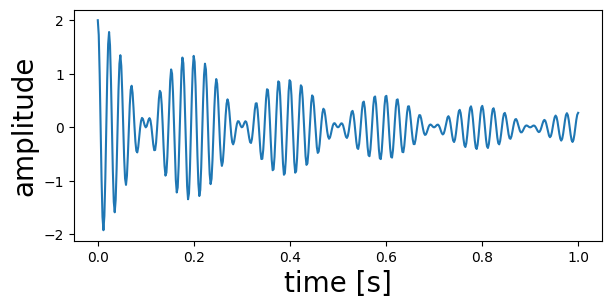

In [15]:
# TASK 2B 

# PUT PARAMETERS HERE
k = 2
fr_1mine = 40
fr_2mine = 45
np_pts = 512
t = np.linspace(0,1,np_pts)

# CREATE THE DECAYING EXPONENTIAL(S) WAVEFORM
def wavepacket(t, fr_1, fr_2, k):
    return np.exp(-k*t) * (np.cos(2*np.pi*fr_1*t) + np.cos(2*np.pi*fr_2*t))

wp1 = wavepacket(t, fr_1mine, fr_2mine, k)
    
# COMPUTE THE FOURIER TRANSFORM SPECTRAL AMPLITUDE
wp1 = wavepacket(t, fr_1mine, fr_2mine, k)

# PLOT STUFF
fs = 20
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, wp1)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs});

# PRINT STATEMENT
print('I see a small quickly oscilating freq that fluctuates in a larger decaying cos pattern away from the origin')

I see a graph that very closely resembles the 2B curve but has some disturbance from the 110Hz graph close to the origin that mostly decays away by the end of the first constructive wave


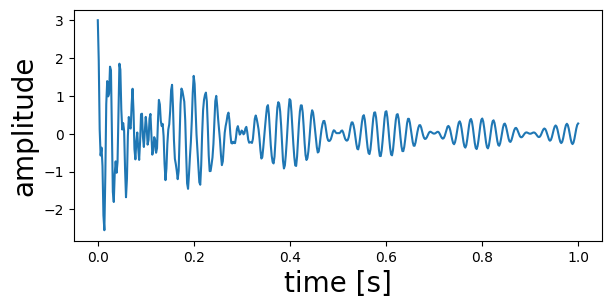

In [16]:
# TASK 2C# 

# PUT PARAMETERS HERE
k_12mine = 2
k_3mine = 8
fr_1mine = 40
fr_2mine = 45
fr_3mine = 110
np_pts = 512
t = np.linspace(0,1,np_pts)

# CREATE THE DECAYING EXPONENTIAL(S) WAVEFORM
def wavepacket(t, fr_1, fr_2, fr_3, k_12, k_3):
    return np.exp(-k_12*t) * (np.cos(2*np.pi*fr_1*t) + np.cos(2*np.pi*fr_2*t)) + np.exp(-k_3*t) * np.cos(2*np.pi*fr_3*t)

wp1 = wavepacket(t, fr_1=fr_1mine, fr_2=fr_2mine, fr_3=fr_3mine, k_12=k_12mine, k_3=k_3mine)

# COMPUTE THE FOURIER TRANSFORM SPECTRAL AMPLITUDE
wp1 = wavepacket(t, fr_1=fr_1mine, fr_2=fr_2mine, fr_3=fr_3mine, k_12=k_12mine, k_3=k_3mine)

# PLOT STUFF
fs = 20
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, wp1)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs});

# PRINT STATEMENT
print('I see a graph that very closely resembles the 2B curve but has some disturbance from the 110Hz graph close to the origin that mostly decays away by the end of the first constructive wave')

Now the beginning of the graph has been almost completely obscured by the third frequency and its hard to differentiate any of the other frequencies until the third dies out by about .3 seconds and it resumes the standard freqency observed from 2B and 2C


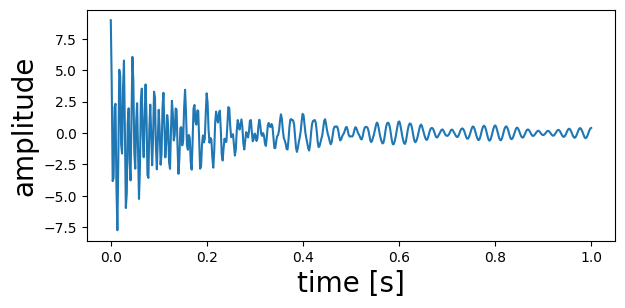

In [17]:
# TASK 2D# 
#Repeat Task 2C with a small variation. This time multiply the second (45Hz) oscillating/decaying 
#cosine wave by 2 and the third (110Hz) by 6 as shown in the equation, below. In your cell for Task 2D, 
#include a print statement answering this queestion: Do the spectral amplitudes change as you expect in the 
#spectral amplitude plot?

# PUT PARAMETERS HERE
k_12mine = 2
k_3mine = 8
fr_1mine = 40
fr_2mine = 45
fr_3mine = 110
np_pts = 512
t = np.linspace(0,1,np_pts)

# CREATE THE DECAYING EXPONENTIAL(S) WAVEFORM
def wavepacket(t, fr_1, fr_2, fr_3, k_12, k_3):
    return np.exp(-k_12*t) * np.cos(2*np.pi*fr_1*t) + 2*(np.exp(-k_12*t)*np.cos(2*np.pi*fr_2*t)) + 6*(np.exp(-k_3*t) * np.cos(2*np.pi*fr_3*t))


# COMPUTE THE FOURIER TRANSFORM SPECTRAL AMPLITUDE
wp1 = wavepacket(t, fr_1=fr_1mine, fr_2=fr_2mine, fr_3=fr_3mine, k_12=k_12mine, k_3=k_3mine)

# PLOT STUFF
fs = 20
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, wp1)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs});

# PRINT STATEMENT
print(f"Now the beginning of the graph has been almost completely obscured by the third frequency and its hard to differentiate any of the other frequencies until the third dies out by about .3 seconds and it resumes the standard freqency observed from 2B and 2C")

**Task 3:** The Fourier transform operation works a bit like how your ear detects pitch. 

Look for the file labeled "JHC.wav" on Canvas under Files \ Python \ Python 3. Listen to that on your device. It is a 
kind of a funky major/minor chord that a famous guitarist and former attendee of Garfield High School (in Seattle) was 
known for. Load the chord, Fourier transform it, and observe the spectrum of notes. In principle you could figure out
all the notes of the chord by looking at the frequencies of the peaks.

Here are a few more details. 
1. You are provided with code to load the WAV file but you have to enter the name between the quotation marks for the 
WAV file yourself. Those two lines of code will return an array called "audio" that is just the waveform but without 
an associated time vector. 
2. You will need to create your own time vector for plotting and fourier transform and should do so by creating an 
array of 16384 numbers from 0 to 2. (This WAV file was encoded with 8192 data points per second and 
your computer/device can get this information in the WAV file when it decides how fast to play something back.)
3. The load WAV file codes need a couple import packages so that has been included in the code for you.

The Canvas folder has a few other chords there if you want to check them out for fun.

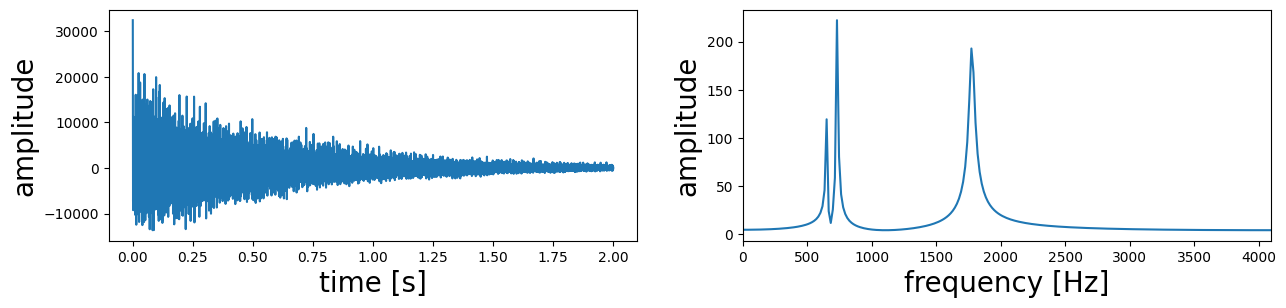

In [18]:
# TASK 3# 

# IMPORT PACKAGES
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftshift
from scipy.io import wavfile
import scipy

# DEFINE CUSTOM FOURIER TRANSFORM FUNCTION (if you clear the kernel)
#reused from earlier kernel

# LOAD WAV FILE
input_data = scipy.io.wavfile.read("JHC.wav") # <-- ENTER FILE NAME HERE BETWEEN THE QUOTES
audio = input_data[1]

# GENERATE TIME ARRAY
np_pts = 16384
t = np.linspace(0,2,np_pts)

# CALCULATE FFT
sa1, fa = fft_amp(t, wp1)

# PLOT STUFF
fs = 20
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
plt.plot(t, audio)
plt.xlabel('time [s]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs});

ax2 = plt.subplot(1,2,2)
plt.plot(fa, sa1)
plt.xlabel('frequency [Hz]',{'fontsize':fs})
plt.ylabel('amplitude',{'fontsize':fs})
plt.xlim([0, fa[-1]]);

**Task 4:** Numerical integration is a numerical technique for calculating the area under a curve (or volumes, and higher dimensional
spaces). We will use a super-simple 1D implementation that works like a Riemann sum. For that, we do these three steps: 1) figure out 
the array indices of the portion of the data that we want to integrate; 2) add up all the data values within the array indices; 3) 
multiply the sum from part 2 by the width of the samples. We are assuming here that all boxes are the same width. 

See the sample code below for integrating the area in a circle. Look at how the code works and think about how the area is calculated 
and why that approach is valid in the limit of very small boxes. See that there is some error evident (to two decimal places) for the 
area of half a circle when n_pts is < 89 but that the error decreases for more boxes (e.g., smaller boxes). Try running the code with
n_pts = 6, 20, 60, 100 and observe the print statement indicating the area in each case and observe how it gets closer to the expected
value for half the area of a circle with radius 2. 

For this task you should download a data file whose number is the same as the last digit of your student number. The data files are on 
Canvas under Files \ Python \ Python 3. Download the file locally and then upload the file to Jupyter hub. The data contain two gaussian
peaks. Find the start and stop indices of the array that are on either side of the first peak at approximately the baseline. It might be 
helpful to find those indices by opening the data file with Notepad++ or by just double clicking the file within Jupyter hub. Call these 
peak1_ind1 and peak1_ind2. Then find the start and stop indices on either side of the second peak (perhaps using names peak2_ind1 and 
peak2_ind2). After that, find the area under each peak. 

Note that it is a little arbitrary to decide exactly the correct indices for integrating a peak, but perhaps try using your eye to judge 
when you can't really tell the difference between the peak and the background fluctuations, or just before the signal begins to rise 
again due to a different, nearby peak.

Create a print statement to inicate the areas of the two peaks that you measured.

the area under the first curve is 547.42 and the area under curve two is 380.35


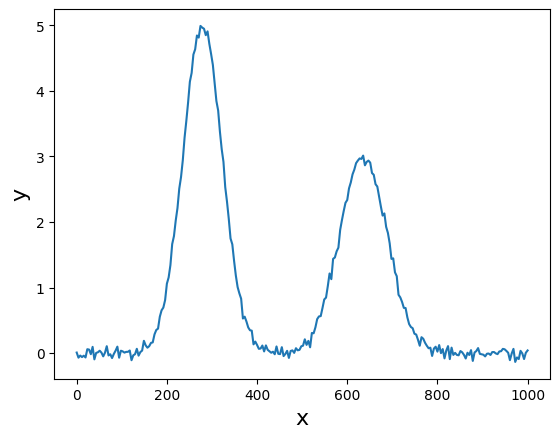

In [38]:
# TASK FOUR 

# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt


# PARAMETERS HERE
graph = np.loadtxt('dubgaus3.txt')
x, y = graph[:,0],graph[:,1]
peak1group = y[41:104]
peak2group = y[123:201]


# LOAD FILE

# PLOT THE FUNCTION HERE
fs = 16
plt.plot(x, y)
plt.xlabel('x',{'fontsize':fs})
plt.ylabel('y',{'fontsize':fs})

# NUMERICAL INTEGRATION HERE
dx1 = x[104]-x[41]               
area1 = np.sum(peak1group)/(104-41) * dx1
dx2 = x[201] - x[123]
area2 = np.sum(peak2group)/(204-123) * dx2
# PRINT STATEMENT HERE
print(f'the area under the first curve is {area1:.2f} and the area under curve two is {area2:.2f}')

The area is 6.28.


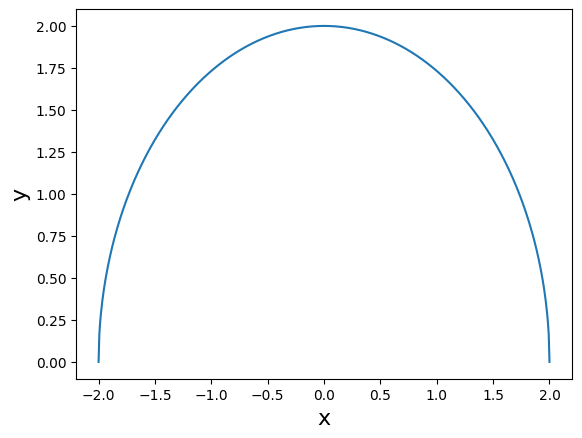

In [23]:
# NUMERICAL INTEGRATION EXAMPLE CODE TO FIND THE AREA OF HALF A CIRCLE

# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt

# PARAMETERS HERE
n_pts = 600
r = 2
x = np.linspace(-r, r, n_pts)
y = np.sqrt(r**2 - x**2)        # this is a function half the area of a circle with radius r

# PLOT THE FUNCTION HERE
fs = 16
plt.plot(x, y)
plt.xlabel('x',{'fontsize':fs})
plt.ylabel('y',{'fontsize':fs})

# NUMERICAL INTEGRATION HERE
dx = x[2]-x[1]                  # the width of each box is the same for all boxes
area = np.sum(y)*dx             # area is the sum of all the areas of the little boxes times the width of each box

# PRINT STATEMENT HERE
print("The area is {:.3}".format(area) + ".")

**Submitting this assignment.** Go to File \ Save and Export Notebook As... \ HTML. Then submit the HTML file to the Python assignment in Canvas.